## Домашнее задание по теме: "Работа с переменными"

Описание задания:

В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

### 1. Получите данные и загрузите их в рабочую среду.

In [ ]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# получение датасета
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# конвертация датасета в pandas dataframe
df = pd.DataFrame(data=np.c_[housing['data'], housing['target']],
                  columns=housing['feature_names'] + ['MedHouseVal'])

df.shape

(20640, 9)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [ ]:
# проверка на пропуски
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Пропуски отсутствуют.

### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [ ]:
from sklearn.model_selection import train_test_split

def dataset_split(df, target, test_size=0.2, random_state=42):
    '''Функция для разбиения датасета на обучающую и тестовые выборки'''
    X =  df.drop([target], axis=1)
    y = df[target]
    return train_test_split(X, y, test_size = test_size, random_state = random_state)

In [ ]:
# разбиение датасета на выборки
X_train, X_test, y_train, y_test = dataset_split(df, 'MedHouseVal')

### 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def get_score(X_train, X_test, y_train, y_test, _return=False):
    '''Функция для вывода метрик RMSE и R^2 по выборкам'''
    model = make_pipeline(StandardScaler(), LinearRegression())

    # обучаем модель
    model.fit(X_train, y_train)

    # считаем метрики
    rmse_train = mean_squared_error(y_train, model.predict(X_train), squared=False)
    rmse_test = mean_squared_error(y_test, model.predict(X_test), squared=False)
    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test = r2_score(y_test, model.predict(X_test))

    rnd = 3

    # выводим результат
    print(f'Среднеквадратическое отклонение (RMSE): {rmse_train.round(rnd)} (обучающая выборка),  {rmse_test.round(rnd)} (тестовая выборка)')
    print(f'Коэффициент детерминации (R^2): {r2_train.round(rnd)} (обучающая выборка),  {r2_test.round(rnd)} (тестовая выборка)')

    if _return:
        # если требуется, возвращаем метрики
        return rmse_train, rmse_test, r2_train, r2_test

In [ ]:
get_score(X_train, X_test, y_train, y_test)

Среднеквадратическое отклонение (RMSE): 0.72 (обучающая выборка),  0.746 (тестовая выборка)
Коэффициент детерминации (R^2): 0.613 (обучающая выборка),  0.576 (тестовая выборка)


### 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

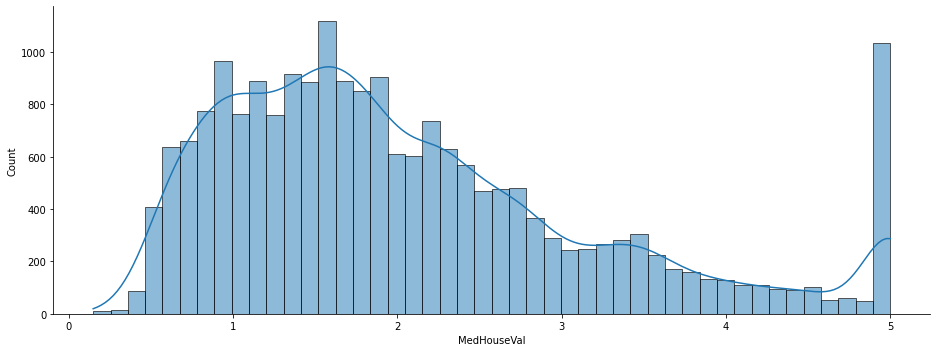

In [ ]:
# график распределения целевой переменной
g = sns.displot(df['MedHouseVal'], kde=True)
g.figure.set_figwidth(15)
g.figure.set_figheight(5)

На графике видим присутствие выбросов.

### 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

a. Сделайте выводы.

b. Удалите признаки на основании полученных значений, выводов.

c. Повторите п. 3, п. 4 на измененных данных.

Text(0.5, 1.0, 'Correlation Matrix')

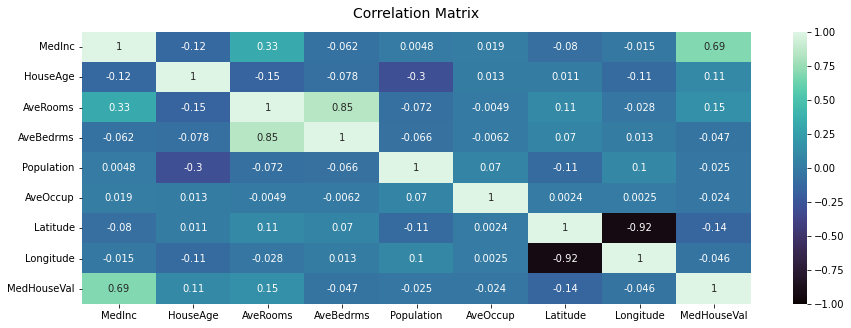

In [ ]:
# корреляционная матрица
plt.figure(figsize=(15, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='mako')
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':14}, pad=14)

На матрице видно отчетливую корреляцию между признаками AveRooms и AveBedrms. 



In [ ]:
# удаление признака AveBedrms
df = df.drop('AveBedrms', axis=1)

df.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# разделение на выборки + вывод метрик
X_train, X_test, y_train, y_test = dataset_split(df, 'MedHouseVal')
get_score(X_train, X_test, y_train, y_test)

Среднеквадратическое отклонение (RMSE): 0.732 (обучающая выборка),  0.74 (тестовая выборка)
Коэффициент детерминации (R^2): 0.6 (обучающая выборка),  0.582 (тестовая выборка)


### 7. Исследуйте оставленные признаки на выбросы.

a. Удалите выбросы в случае обнаружения.

b. Повторите п. 3, п. 4 на измененных данных.

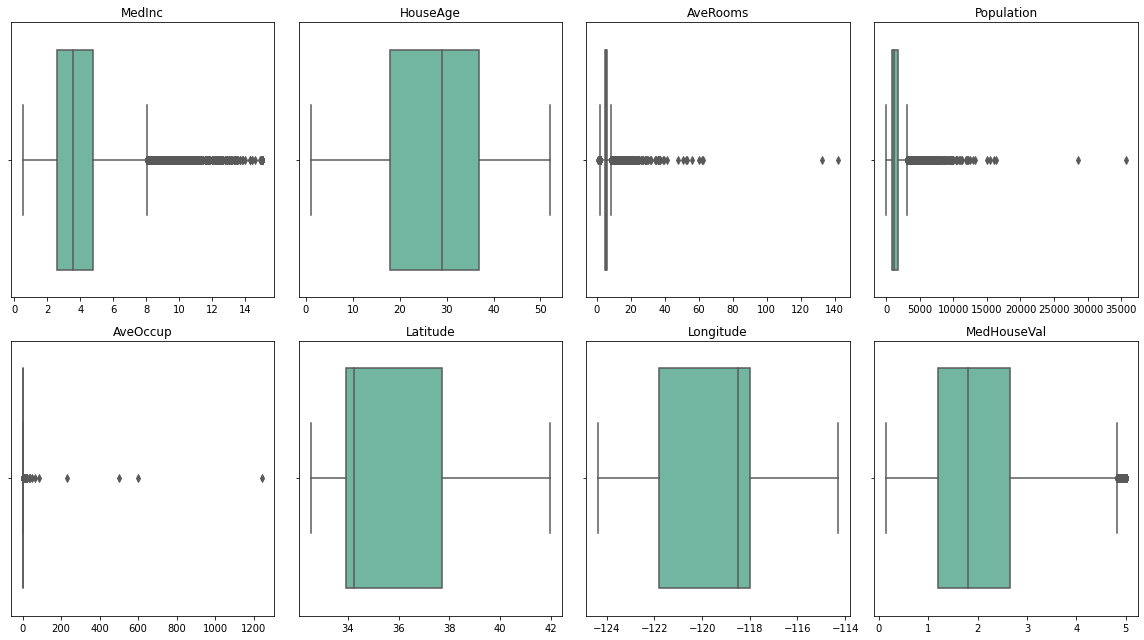

In [ ]:
# строим boxplot по всем признакам из датасета
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 9))

for i, ax in enumerate(axs.flat):
    sns.boxplot(x=df.iloc[:, i], ax=ax, palette='Set2')
    ax.set_title(df.columns[i])
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [ ]:
# удаление выбросов
df = df[df['AveRooms'] < 120]
df = df[df['AveOccup'] < 20]
df.shape

(20628, 8)

Удалено 12 строк с выбросами.

In [ ]:
# разделение на выборки + вывод метрик
X_train, X_test, y_train, y_test = dataset_split(df, 'MedHouseVal')
get_score(X_train, X_test, y_train, y_test)

Среднеквадратическое отклонение (RMSE): 0.694 (обучающая выборка),  0.696 (тестовая выборка)
Коэффициент детерминации (R^2): 0.638 (обучающая выборка),  0.636 (тестовая выборка)


После удаления выбросов видно значительное улучшение метрик.

### 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

a. Повторите п. 3, п. 4 на измененных данных.

In [ ]:
df['AveOccup'] = np.log(df['AveOccup'])
df['HouseAge'] = np.square(df['HouseAge'])
df.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,1681.0,6.984127,322.0,0.938270,37.88,-122.23,4.526
1,8.3014,441.0,6.238137,2401.0,0.746613,37.86,-122.22,3.585
2,7.2574,2704.0,8.288136,496.0,1.030426,37.85,-122.24,3.521
3,5.6431,2704.0,5.817352,558.0,0.935287,37.85,-122.25,3.413
4,3.8462,2704.0,6.281853,565.0,0.779998,37.85,-122.25,3.422


In [ ]:
# разделение на выборки + вывод метрик
X_train, X_test, y_train, y_test = dataset_split(df, 'MedHouseVal')
get_score(X_train, X_test, y_train, y_test)

Среднеквадратическое отклонение (RMSE): 0.674 (обучающая выборка),  0.676 (тестовая выборка)
Коэффициент детерминации (R^2): 0.659 (обучающая выборка),  0.656 (тестовая выборка)


### 9. Сформулируйте выводы по проделанной работе.

a. Кратко опишите какие преобразования были сделаны с данными.

b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.

c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

В процессе выполнения задания были удалены признаки с высокой корреляцией, удалены выбросы и проведены математические операции над признаками. Эти манипулации позволили улучшить показатели метрик RMSE и R^2.

Таблица с 4 моделями и их метриками (тестовая выборка):

| | RMSE | R^2 |
|-|-|-|
| Неизмененные признаки | 0.746 | 0.576 |
| Признаки, отобранные на основе значений корреляции | 0.74 | 0.582 |
| Признаки, отобранные на основе значений корреляции и удаленными выбросами| 0.696 | 0.636 |
| Признаки, отобранные на основе значений корреляции, удаленными выбросами и математическими операциями| 0.676 | 0.656 |